In [1]:
# !pip install scikit-surprise

In [3]:
import pandas as pd
import os 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
import re

In [5]:
#reading all three files
agency = pd.read_csv("/project/notebooks/agency_alg.csv")
client = pd.read_csv("/project/notebooks/client_alg.csv")
rfm = pd.read_csv("/project/notebooks/rfm_alg.csv")

In [6]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Client                                              280 non-null    object 
 1   Brief                                               280 non-null    object 
 2   Agency                                              280 non-null    object 
 3   Project extension 
with same agency                 280 non-null    int64  
 4   Client selected agency
themselves from marketplace  280 non-null    float64
 5   Right geography
 / time zone                        280 non-null    int64  
 6   Strong skill
set match                              280 non-null    int64  
 7   Deep / relevant
sector expertise                    280 non-null    int64  
 8   Good cultural fit                                   280 non-null    int64  
 9  

In [7]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Brief                                   162 non-null    object 
 1   Category                                162 non-null    object 
 2   Client Name                             162 non-null    object 
 3   Status                                  162 non-null    object 
 4   Lead                                    162 non-null    object 
 5   Shortlisted Agencies                    162 non-null    object 
 6   Winning Agency                          162 non-null    object 
 7   Region                                  162 non-null    object 
 8   Agency 1                                162 non-null    object 
 9   Agency 2                                162 non-null    object 
 10  Agency 3                                162 non-null    object

In [10]:
#sorting values for RFM
rfm = rfm.sort_values(by='Client')

# Reset the index
rfm = rfm.reset_index(drop=True)
rfm.head()

,Client,Brief,Agency,Project extension \nwith same agency,Client selected agency\nthemselves from marketplace,Right geography\n / time zone,Strong skill\nset match,Deep / relevant\nsector expertise,Good cultural fit,Right price level,Strong track record,Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough,Match Score
0,AXA,countrywide broker video,Shoreditch Design Studio,0,0.0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0.465116
1,AXA,prop dev ev cc insurance,Daughter Studio,0,0.0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0.418605
2,AXA,prop dev ev cc insurance,CreateFuture,0,0.0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0.418605
3,AXA,award application x,Boost Awards,0,0.0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0.418605
4,AXA,prop dev ev cc insurance,Blue Feathers,0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0.348837


In [11]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary resources for NLP (run only once)
# nltk.download('stopwords')
# nltk.download('wordnet')

# Define a function to clean and standardize text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Tokenize the text into individual words
    tokens = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Clean and standardize the "brief" column
client['Brief'] = client['Brief'].apply(clean_text)
rfm['Brief'] = rfm['Brief'].apply(clean_text)

### similarity between rfm and client to do a possible merge?

check with jiangbo-- ok to merge on brief?

In [12]:
# Get the unique brief names from each dataset
brief_names1 = set(rfm["Brief"])
brief_names2 = set(client["Brief"])

# Finding the common brief names
common_brief_names = brief_names1.intersection(brief_names2)

# Getting the number of common brief names
num_common_brief_names = len(common_brief_names)

# Printing the number of common brief names
print("Number of common brief names:", num_common_brief_names)

# Printing the common brief names
print(common_brief_names)

Number of common brief names: 138
{'content design pulse', 'oneapp ux ui design extension', 'jlr panthera oneapp design project extension luxury crm service design', 'brand positioning', 'climate prop', 'chat chatbot', 'dw persona', 'generative ai', 'claim intake experience', 'vox soul website', 'expert video x london', 'visualisation', 'cm implementation website redesign discover', 'dsm mvp planning', 'skin care brief', 'ux prototyping', 'digital roadmap', 'group life content', 'aviva award entry', 'vehicle health product', 'senior ui designer', 'video content', 'dw e e prototype', 'social medium pride birmingham event coverage', 'cover sense ph data science', 'dw customer strategy', 'oneaviva narrative', 'cover sense ph jn', 'concept design', 'bid support', 'prop vision', 'corporate website design build', 'social medium veezu', 'home sustainability smoke test', 'v aviva advisor prop messaging', 'acuity magazine podcast series', 'ux ui retained squad', 'brand escape room design', 'pri

In [13]:
common_brief_names = set(client['Brief']).intersection(set(rfm['Brief']))

# Filtering the datasets for the common briefs
client_c = client[client['Brief'].isin(common_brief_names)]
rfm_c = rfm[rfm['Brief'].isin(common_brief_names)]

# Merging the datasets on the common briefs
cli_rfm = pd.merge(client_c, rfm_c, on='Brief')
cli_rfm

,Brief,Category,Client Name,Status,Lead,Shortlisted Agencies,Winning Agency,Region,Agency 1,Agency 2,...,Strong track record,Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough,Match Score
0,award application x,PR & Communications,AXA,Started,Phil Kohler,"Boost Awards,Reed Words",Boost Awards,united kingdom,Boost Awards,Reed Words,...,1,0,0,0,0,0,0,1,0,0.418605
1,award application x,PR & Communications,AXA,Started,Phil Kohler,"Boost Awards,Reed Words",Boost Awards,united kingdom,Boost Awards,Reed Words,...,1,0,0,0,0,0,0,1,0,0.418605
2,countrywide broker video,Video,AXA,Archived,Peter Sayburn,"Viewpoint Studios,Shoreditch Design Studio",Shoreditch Design Studio,united kingdom,Viewpoint Studios,Shoreditch Design Studio,...,1,0,0,0,0,0,1,0,0,0.465116
3,countrywide broker video,Video,AXA,Archived,Peter Sayburn,"Viewpoint Studios,Shoreditch Design Studio",Shoreditch Design Studio,united kingdom,Viewpoint Studios,Shoreditch Design Studio,...,0,0,0,0,0,0,1,0,0,0.372093
4,prop dev ev cc insurance,Proposition Design,AXA,Started,Phil Kohler,"Blue Feathers,Daughter Studio,CreateFuture",Daughter Studio,united kingdom,Blue Feathers,Daughter Studio,...,1,0,0,0,0,0,0,1,0,0.418605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,social medium veezu,Social & Content,Veezu,Started,Paul Bowman,"GH05T Ltd.,Nonsensical,Spin Brands",GH05T Ltd.,united kingdom,GH05T Ltd.,Nonsensical,...,1,0,0,0,0,1,0,0,0,0.604651
258,social medium veezu,Social & Content,Veezu,Started,Paul Bowman,"GH05T Ltd.,Nonsensical,Spin Brands",GH05T Ltd.,united kingdom,GH05T Ltd.,Nonsensical,...,0,0,0,0,0,1,0,0,0,0.139535
259,social medium veezu,Social & Content,Veezu,Started,Paul Bowman,"GH05T Ltd.,Nonsensical,Spin Brands",GH05T Ltd.,united kingdom,GH05T Ltd.,Nonsensical,...,1,0,0,0,0,1,0,0,0,0.325581
260,sme engagement,Proposition Design,Wave,Archived,Paul Bowman,NMD+,NMD+,united kingdom,NMD+,1,...,0,0,0,0,0,1,0,0,0,0.023256


In [14]:
cli_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 42 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Brief                                               262 non-null    object 
 1   Category                                            262 non-null    object 
 2   Client Name                                         262 non-null    object 
 3   Status                                              262 non-null    object 
 4   Lead                                                262 non-null    object 
 5   Shortlisted Agencies                                262 non-null    object 
 6   Winning Agency                                      262 non-null    object 
 7   Region                                              262 non-null    object 
 8   Agency 1                                            262 non-null    object 
 9  

In [15]:
cli_rfm

,Brief,Category,Client Name,Status,Lead,Shortlisted Agencies,Winning Agency,Region,Agency 1,Agency 2,...,Strong track record,Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough,Match Score
0,award application x,PR & Communications,AXA,Started,Phil Kohler,"Boost Awards,Reed Words",Boost Awards,united kingdom,Boost Awards,Reed Words,...,1,0,0,0,0,0,0,1,0,0.418605
1,award application x,PR & Communications,AXA,Started,Phil Kohler,"Boost Awards,Reed Words",Boost Awards,united kingdom,Boost Awards,Reed Words,...,1,0,0,0,0,0,0,1,0,0.418605
2,countrywide broker video,Video,AXA,Archived,Peter Sayburn,"Viewpoint Studios,Shoreditch Design Studio",Shoreditch Design Studio,united kingdom,Viewpoint Studios,Shoreditch Design Studio,...,1,0,0,0,0,0,1,0,0,0.465116
3,countrywide broker video,Video,AXA,Archived,Peter Sayburn,"Viewpoint Studios,Shoreditch Design Studio",Shoreditch Design Studio,united kingdom,Viewpoint Studios,Shoreditch Design Studio,...,0,0,0,0,0,0,1,0,0,0.372093
4,prop dev ev cc insurance,Proposition Design,AXA,Started,Phil Kohler,"Blue Feathers,Daughter Studio,CreateFuture",Daughter Studio,united kingdom,Blue Feathers,Daughter Studio,...,1,0,0,0,0,0,0,1,0,0.418605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,social medium veezu,Social & Content,Veezu,Started,Paul Bowman,"GH05T Ltd.,Nonsensical,Spin Brands",GH05T Ltd.,united kingdom,GH05T Ltd.,Nonsensical,...,1,0,0,0,0,1,0,0,0,0.604651
258,social medium veezu,Social & Content,Veezu,Started,Paul Bowman,"GH05T Ltd.,Nonsensical,Spin Brands",GH05T Ltd.,united kingdom,GH05T Ltd.,Nonsensical,...,0,0,0,0,0,1,0,0,0,0.139535
259,social medium veezu,Social & Content,Veezu,Started,Paul Bowman,"GH05T Ltd.,Nonsensical,Spin Brands",GH05T Ltd.,united kingdom,GH05T Ltd.,Nonsensical,...,1,0,0,0,0,1,0,0,0,0.325581
260,sme engagement,Proposition Design,Wave,Archived,Paul Bowman,NMD+,NMD+,united kingdom,NMD+,1,...,0,0,0,0,0,1,0,0,0,0.023256


In [16]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a function to clean and standardize text
def clean_text(text):
    # Check if the text is a comma-separated value
    if ',' in text:
        # Split the text into individual values
        values = text.split(',')
        
        # Clean and standardize each value
        cleaned_values = [clean_value.strip().lower() for clean_value in values]
        
        # Join the cleaned values back with commas
        cleaned_text = ', '.join(cleaned_values)
    else:
        # Clean and standardize the text
        cleaned_text = text.strip().lower()
    
    return cleaned_text

# Iterate over the columns and apply the text cleaning and standardization
for column in cli_rfm.columns:
    if cli_rfm[column].dtype == 'object':
        cli_rfm[column] = cli_rfm[column].apply(clean_text)

In [17]:
cli_rfm

,Brief,Category,Client Name,Status,Lead,Shortlisted Agencies,Winning Agency,Region,Agency 1,Agency 2,...,Strong track record,Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough,Match Score
0,award application x,pr & communications,axa,started,phil kohler,"boost awards, reed words",boost awards,united kingdom,boost awards,reed words,...,1,0,0,0,0,0,0,1,0,0.418605
1,award application x,pr & communications,axa,started,phil kohler,"boost awards, reed words",boost awards,united kingdom,boost awards,reed words,...,1,0,0,0,0,0,0,1,0,0.418605
2,countrywide broker video,video,axa,archived,peter sayburn,"viewpoint studios, shoreditch design studio",shoreditch design studio,united kingdom,viewpoint studios,shoreditch design studio,...,1,0,0,0,0,0,1,0,0,0.465116
3,countrywide broker video,video,axa,archived,peter sayburn,"viewpoint studios, shoreditch design studio",shoreditch design studio,united kingdom,viewpoint studios,shoreditch design studio,...,0,0,0,0,0,0,1,0,0,0.372093
4,prop dev ev cc insurance,proposition design,axa,started,phil kohler,"blue feathers, daughter studio, createfuture",daughter studio,united kingdom,blue feathers,daughter studio,...,1,0,0,0,0,0,0,1,0,0.418605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,social medium veezu,social & content,veezu,started,paul bowman,"gh05t ltd., nonsensical, spin brands",gh05t ltd.,united kingdom,gh05t ltd.,nonsensical,...,1,0,0,0,0,1,0,0,0,0.604651
258,social medium veezu,social & content,veezu,started,paul bowman,"gh05t ltd., nonsensical, spin brands",gh05t ltd.,united kingdom,gh05t ltd.,nonsensical,...,0,0,0,0,0,1,0,0,0,0.139535
259,social medium veezu,social & content,veezu,started,paul bowman,"gh05t ltd., nonsensical, spin brands",gh05t ltd.,united kingdom,gh05t ltd.,nonsensical,...,1,0,0,0,0,1,0,0,0,0.325581
260,sme engagement,proposition design,wave,archived,paul bowman,nmd+,nmd+,united kingdom,nmd+,1,...,0,0,0,0,0,1,0,0,0,0.023256


In [18]:
# cli_rfm.to_csv('cli_rfm.csv', index=False)

## checking for same values with client and client name columns

In [19]:
# Check if "client" and "client name" have the same values
same_values = cli_rfm['Client'] == cli_rfm['Client Name']

# Check if all instances have the same values
all_same_values = same_values.all()

# Print the result
if all_same_values:
    print("All instances have the same values for 'client' and 'client name'.")
else:
    print("There are instances with different values for 'client' and 'client name'.")

There are instances with different values for 'client' and 'client name'.


In [20]:
# Filter the DataFrame to keep only the rows with different values
different_instances = cli_rfm[~same_values]

# Count the number of different instances
num_different_instances = len(different_instances)

# Print the number of different instances
print("Number of different instances:", num_different_instances)

# Print the different instances
print("Different instances:")
different_instances

Number of different instances: 18
Different instances:


,Brief,Category,Client Name,Status,Lead,Shortlisted Agencies,Winning Agency,Region,Agency 1,Agency 2,...,Strong track record,Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough,Match Score
20,brand refresh,brand strategy,auspaynet,matching,kate walker,"cocogun, houston group, principals",houston group,australia,cocogun,houston group,...,1,0,0,0,1,0,0,0,0,0.930233
21,brand refresh,brand strategy,ma financial group,started,kate walker,houston group,houston group,australia,houston group,1,...,1,0,0,0,1,0,0,0,0,0.325581
22,brand refresh,brand strategy,ma financial group,started,kate walker,houston group,houston group,australia,houston group,1,...,1,0,0,0,1,0,0,0,0,0.790698
23,brand refresh,brand strategy,ma financial group,started,kate walker,houston group,houston group,australia,houston group,1,...,1,0,0,0,1,0,0,0,0,0.930233
24,brand refresh,brand strategy,ma financial group,started,kate walker,houston group,houston group,australia,houston group,1,...,1,0,0,0,1,0,0,0,0,0.930233
89,social web plan,social & content,aviva,archived,paul bowman,"nmd+, polar media house",nmd+,united kingdom,nmd+,polar media house,...,0,0,0,0,0,1,0,0,0,0.139535
90,social web plan,social & content,aviva,archived,paul bowman,"nmd+, polar media house",nmd+,united kingdom,nmd+,polar media house,...,0,0,0,0,0,1,0,0,0,0.023256
181,financial website build extension sprint,software development,ma financial group,contracting,robin scarborough,palo it,palo it,australia,palo it,1,...,0,0,0,0,0,0,0,0,1,0.046512
182,paid performance medium set campaign mgmt,digital marketing,ma financial group,started,kate walker,"balmer agency, shines digital, in marketing we...",in marketing we trust,australia,balmer agency,shines digital,...,1,0,0,0,1,0,0,0,0,0.790698
183,paid performance medium set campaign mgmt,digital marketing,ma financial group,started,kate walker,"balmer agency, shines digital, in marketing we...",in marketing we trust,australia,balmer agency,shines digital,...,1,0,0,0,1,0,0,0,0,0.697674


In [21]:
cli_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 42 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Brief                                               262 non-null    object 
 1   Category                                            262 non-null    object 
 2   Client Name                                         262 non-null    object 
 3   Status                                              262 non-null    object 
 4   Lead                                                262 non-null    object 
 5   Shortlisted Agencies                                262 non-null    object 
 6   Winning Agency                                      262 non-null    object 
 7   Region                                              262 non-null    object 
 8   Agency 1                                            262 non-null    object 
 9  

In [22]:
# cli_rfm.to_csv("cli_rfm_new.csv", index= False)

In [23]:
# different_instances.to_csv("common_client_common.csv", index = False)

In [24]:
selected_columns = ['Client', 'Client Name']
df_selected = different_instances[selected_columns]
df_selected

,Client,Client Name
20,ma financial,auspaynet
21,auspaynet,ma financial group
22,auspaynet,ma financial group
23,auspaynet,ma financial group
24,ma financial,ma financial group
89,wave,aviva
90,wave,aviva
181,ma financial,ma financial group
182,ma financial,ma financial group
183,ma financial,ma financial group


for the same instance, how are there different names for the client? maybe the reaons for matching has missing data? adn so it's overriding with the correct one?


### ^there are different names for the same client, have to check with what andrew sai

In [42]:
cli_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 42 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Brief                                               262 non-null    object 
 1   Category                                            262 non-null    object 
 2   Client Name                                         262 non-null    object 
 3   Status                                              262 non-null    object 
 4   Lead                                                262 non-null    object 
 5   Shortlisted Agencies                                262 non-null    object 
 6   Winning Agency                                      262 non-null    object 
 7   Region                                              262 non-null    object 
 8   Agency 1                                            262 non-null    object 
 9  

In [25]:
cli_rfm.head()

,Brief,Category,Client Name,Status,Lead,Shortlisted Agencies,Winning Agency,Region,Agency 1,Agency 2,...,Strong track record,Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough,Match Score
0,award application x,pr & communications,axa,started,phil kohler,"boost awards, reed words",boost awards,united kingdom,boost awards,reed words,...,1,0,0,0,0,0,0,1,0,0.418605
1,award application x,pr & communications,axa,started,phil kohler,"boost awards, reed words",boost awards,united kingdom,boost awards,reed words,...,1,0,0,0,0,0,0,1,0,0.418605
2,countrywide broker video,video,axa,archived,peter sayburn,"viewpoint studios, shoreditch design studio",shoreditch design studio,united kingdom,viewpoint studios,shoreditch design studio,...,1,0,0,0,0,0,1,0,0,0.465116
3,countrywide broker video,video,axa,archived,peter sayburn,"viewpoint studios, shoreditch design studio",shoreditch design studio,united kingdom,viewpoint studios,shoreditch design studio,...,0,0,0,0,0,0,1,0,0,0.372093
4,prop dev ev cc insurance,proposition design,axa,started,phil kohler,"blue feathers, daughter studio, createfuture",daughter studio,united kingdom,blue feathers,daughter studio,...,1,0,0,0,0,0,0,1,0,0.418605


In [26]:
cli_rfm.rename(columns={"Tags" : "Brief Tags"}, inplace=True)

# checking for duplicates

In [27]:
# Checking for duplicates based on all columns
duplicates = cli_rfm.duplicated()

# Counting the number of duplicates
num_duplicates = duplicates.sum()

# Printing the count of duplicates
print("Number of duplicates:", num_duplicates)

duplicates

Number of duplicates: 0


0      False
1      False
2      False
3      False
4      False
       ...  
257    False
258    False
259    False
260    False
261    False
Length: 262, dtype: bool

In [28]:
# Keeping only the first occurrence of each duplicate and dropping the others
cli_rfm = cli_rfm.drop_duplicates(keep='first')

# Print the DataFrame with duplicates dropped
cli_rfm

,Brief,Category,Client Name,Status,Lead,Shortlisted Agencies,Winning Agency,Region,Agency 1,Agency 2,...,Strong track record,Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough,Match Score
0,award application x,pr & communications,axa,started,phil kohler,"boost awards, reed words",boost awards,united kingdom,boost awards,reed words,...,1,0,0,0,0,0,0,1,0,0.418605
1,award application x,pr & communications,axa,started,phil kohler,"boost awards, reed words",boost awards,united kingdom,boost awards,reed words,...,1,0,0,0,0,0,0,1,0,0.418605
2,countrywide broker video,video,axa,archived,peter sayburn,"viewpoint studios, shoreditch design studio",shoreditch design studio,united kingdom,viewpoint studios,shoreditch design studio,...,1,0,0,0,0,0,1,0,0,0.465116
3,countrywide broker video,video,axa,archived,peter sayburn,"viewpoint studios, shoreditch design studio",shoreditch design studio,united kingdom,viewpoint studios,shoreditch design studio,...,0,0,0,0,0,0,1,0,0,0.372093
4,prop dev ev cc insurance,proposition design,axa,started,phil kohler,"blue feathers, daughter studio, createfuture",daughter studio,united kingdom,blue feathers,daughter studio,...,1,0,0,0,0,0,0,1,0,0.418605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,social medium veezu,social & content,veezu,started,paul bowman,"gh05t ltd., nonsensical, spin brands",gh05t ltd.,united kingdom,gh05t ltd.,nonsensical,...,1,0,0,0,0,1,0,0,0,0.604651
258,social medium veezu,social & content,veezu,started,paul bowman,"gh05t ltd., nonsensical, spin brands",gh05t ltd.,united kingdom,gh05t ltd.,nonsensical,...,0,0,0,0,0,1,0,0,0,0.139535
259,social medium veezu,social & content,veezu,started,paul bowman,"gh05t ltd., nonsensical, spin brands",gh05t ltd.,united kingdom,gh05t ltd.,nonsensical,...,1,0,0,0,0,1,0,0,0,0.325581
260,sme engagement,proposition design,wave,archived,paul bowman,nmd+,nmd+,united kingdom,nmd+,1,...,0,0,0,0,0,1,0,0,0,0.023256


In [29]:
agency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Agency                    210 non-null    object
 1   Skills                    202 non-null    object
 2   Industries                202 non-null    object
 3   Service Description       208 non-null    object
 4   Vision                    78 non-null     object
 5   Industry Experience       77 non-null     object
 6   Agency short description  210 non-null    object
 7   Agency services           210 non-null    object
 8   Any other services        140 non-null    object
 9   Locations                 210 non-null    object
dtypes: object(10)
memory usage: 16.5+ KB


In [30]:
# cli_rfm processing
data1 = cli_rfm.copy()
# Select columns that need to be exploded (split into multiple rows) and explode them
for col in ['Brief Tags', 'Shortlisted Agencies']: 
    data1 = data1.assign(**{col: data1[col].str.split(',')}).explode(col)

# Now, fill missing values and generate dummy variables
data1 = data1.fillna('missing')
obj_data1 = data1.select_dtypes(include=['object']).copy()
data1_encoded = pd.get_dummies(obj_data1, drop_first=True)

In [31]:
data1_encoded

,Brief_adobe website design planning sprint,Brief_aviva advisor prop messaging,Brief_aviva award entry,Brief_aviva masterclass tiktok,Brief_aviva social medium team,Brief_award application x,Brief_bid support,Brief_biffa corporate event support,Brief_brand escape room design,Brief_brand positioning,...,Agency_the park,Agency_three whiskey,Agency_tinker taylor,Agency_tobias,Agency_unpitchd,Agency_versa agency,Agency_verve,Agency_viewpoint studios,Agency_wonderful,Agency_xdesign
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Recommendation Algorithm with Cosine Similarity
## Text similarity looked at, combined all text related columns and a similarity matix developed to thereafter generate recommendations 

### concept of content based filtering: if a client liked a certain agency, they will like other similar agencies

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Drop irrelevant columns
cli_rfm.drop(['Agency 1', 'Agency 2', 'Agency 3', 'Agency 4', 'Agency 5', 'Agency 6', 
              'Agency Count', 'Lead_George Patten', 'Lead_Gideon Hyde', 'Lead_Hannah Fraser', 'Lead_Kate Walker', 
              'Lead_Paul Bowman', 'Lead_Peter Sayburn', 'Lead_Phil Kohler', 'Lead_Robin Scarborough'], axis=1, inplace=True)
agency.drop(['Vision', 'Industry Experience'], axis=1, inplace=True)

# Filling null values with empty string
cli_rfm = cli_rfm.fillna('')
agency = agency.fillna('')

In [33]:
# Join the text columns in both dataframes to create a unified text for each entry
cli_rfm['text'] = cli_rfm['Brief'] + ' ' + cli_rfm['Category'] + ' ' + cli_rfm['Brief Tags'] + ' ' + cli_rfm['Client'] + ' ' + cli_rfm['Region']
agency['text'] = agency['Agency'] + ' ' + agency['Skills'] + ' ' + agency['Industries'] + ' ' + agency['Service Description'] + ' ' + agency['Agency services'] + ' ' + agency['Locations']

In [34]:
cli_rfm.head()

,Brief,Category,Client Name,Status,Lead,Shortlisted Agencies,Winning Agency,Region,Client_WA_Interaction,shortlisted_agency_1_interaction_count,...,Project extension \nwith same agency,Client selected agency\nthemselves from marketplace,Right geography\n / time zone,Strong skill\nset match,Deep / relevant\nsector expertise,Good cultural fit,Right price level,Strong track record,Match Score,text
0,award application x,pr & communications,axa,started,phil kohler,"boost awards, reed words",boost awards,united kingdom,1.0,1,...,0,0.0,1,1,0,0,0,1,0.418605,award application x pr & communications rol op...
1,award application x,pr & communications,axa,started,phil kohler,"boost awards, reed words",boost awards,united kingdom,1.0,1,...,0,0.0,1,1,0,0,0,1,0.418605,award application x pr & communications rol op...
2,countrywide broker video,video,axa,archived,peter sayburn,"viewpoint studios, shoreditch design studio",shoreditch design studio,united kingdom,1.0,1,...,0,0.0,0,1,0,0,1,1,0.465116,"countrywide broker video video photography, ev..."
3,countrywide broker video,video,axa,archived,peter sayburn,"viewpoint studios, shoreditch design studio",shoreditch design studio,united kingdom,1.0,1,...,0,0.0,0,1,0,0,1,0,0.372093,"countrywide broker video video photography, ev..."
4,prop dev ev cc insurance,proposition design,axa,started,phil kohler,"blue feathers, daughter studio, createfuture",daughter studio,united kingdom,1.0,1,...,0,0.0,1,1,0,0,0,1,0.418605,prop dev ev cc insurance proposition design we...


In [35]:
cli_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Brief                                               262 non-null    object 
 1   Category                                            262 non-null    object 
 2   Client Name                                         262 non-null    object 
 3   Status                                              262 non-null    object 
 4   Lead                                                262 non-null    object 
 5   Shortlisted Agencies                                262 non-null    object 
 6   Winning Agency                                      262 non-null    object 
 7   Region                                              262 non-null    object 
 8   Client_WA_Interaction                               262 non-null    float64
 9  

In [36]:
# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Compute TF-IDF values for cli_rfm and agency
cli_rfm_matrix = vectorizer.fit_transform(cli_rfm['text'])
agency_matrix = vectorizer.transform(agency['text'])  # use transform to ensure the vocabulary is the same as cli_rfm_matrix

# Compute similarity scores
similarity_scores = cosine_similarity(cli_rfm_matrix, agency_matrix)

### in the above similarity matrix created, each row corresponds to a client brief and a column corresponds to an agency, that is---
#### The value at row i and column j represents how similar brief i is to agency j.

In [38]:
# Get the index of the most similar agency for each brief
target = similarity_scores.argmax(axis=1)

# Split the data into training set and test set
cli_rfm_train, cli_rfm_test, target_train, target_test = train_test_split(cli_rfm, target, test_size=0.2, random_state=42)

# Now, you can train your model on cli_rfm_train and target_train
# And evaluate it on cli_rfm_test and target_test


In [39]:
def recommend_agencies(new_brief, vectorizer, agency_matrix, agency):
    # Combine all the relevant info about the new brief into a single string
    # You can add more fields here if they are relevant
    new_brief_text = new_brief['Brief'] + ' ' + new_brief['Category'] + ' ' + new_brief['Brief Tags'] + ' ' + new_brief['Client'] + ' ' + new_brief['Region']

    # Compute the TF-IDF values for the new brief
    new_brief_vector = vectorizer.transform([new_brief_text])

    # Compute the similarity scores between the new brief and all agencies
    similarity_scores = cosine_similarity(new_brief_vector, agency_matrix)

    # Get the indices of the agencies sorted by their similarity scores
    sorted_indices = similarity_scores.argsort().flatten()[::-1]

    # Get the top 3 agencies
    top_3_agencies = agency.iloc[sorted_indices[:3]]

    return top_3_agencies


#### testing 

In [40]:
new_brief = {
    'Brief': 'We need a new marketing campaign',
    'Category': 'Marketing',
    'Brief Tags': 'campaign, creative, advertising',
    'Client': 'ACME Inc.',
    'Region': 'United States',
}

# We can get recommendations for this new brief like this:
recommendations = recommend_agencies(new_brief, vectorizer, agency_matrix, agency)
recommendations


,Agency,Skills,Industries,Service Description,Agency short description,Agency services,Any other services,Locations,text
17,rocketer,NO INFO,NO INFO,year digital marketing innovator,year digital marketing innovator,creative production software development digit...,business transformation consultancy demand gen...,"United Kingdom, United States",rocketer NO INFO NO INFO year digital marketin...
22,ubiquitous,NO INFO,NO INFO,ubiquitosu help brand run influencer marketing...,ubiquitosu help brand run influencer marketing...,social content digital marketing medium buying,influencer marketing,United States,ubiquitous NO INFO NO INFO ubiquitosu help bra...
4,chs,NO INFO,NO INFO,awardwinning digital first full service agency,awardwinning digital first full service agency,brand strategy creative production digital mar...,photography film,"United Kingdom, United States",chs NO INFO NO INFO awardwinning digital first...


In [64]:
new_brief = {
    'Brief': 'We need a new marketing campaign, expertise and specialisation in digital.',
    'Category': 'Design',
    'Brief Tags': 'campaign, creative, advertising',
    'Client': 'ACME Inc.',
    'Region': 'United Kingdom',
}

# We can get recommendations for this new brief like this:
recommendations = recommend_agencies(new_brief, vectorizer, agency_matrix, agency)
recommendations


,Agency,Skills,Industries,Service Description,Agency short description,Agency services,Any other services,Locations,text
99,ayo banton,"Blockchain / Web 3, Advertising, Brand Strateg...",B2B,creative content agency adept leading multifac...,creative content agency adept leading multifac...,creative production,,United Kingdom,"ayo banton Blockchain / Web 3, Advertising, Br..."
183,found.,"Advertising, Brand Strategy, Copywriting, Crea...",B2B,digital marketing agency help brand get found ...,digital marketing agency help brand get found ...,marketing planning social content digital mark...,organic search paid medium digital experience ...,United Kingdom,"found. Advertising, Brand Strategy, Copywritin..."
55,studio something,"Brand Design, Advertising, Brand Strategy, Soc...","Alcoholic Beverages, Education, Entertainment,...",creative entertainment,make something people genuinely like,brand strategy creative production marketing p...,broadcast entertainment brand design,United Kingdom,"studio something Brand Design, Advertising, Br..."


# Item based collaborative filtering
### singular value decomposition (SVD-matrix factorization method)

### concept used: if a client has similar preferences as another client, then the agencies that the other client liked could also be recommended to this client.

In [43]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, train_test_split

# Define a Reader object
# The Reader object helps in parsing the file or dataframe containing ratings
reader = Reader()

# Create the dataset to be used for building the filter
data = Dataset.load_from_df(cli_rfm[['Brief', 'Agency', 'Match Score']], reader)

# Split the dataset into train and test
trainset, testset = train_test_split(data, test_size=0.25)

# Define the SVD algorithm object
svd = SVD()

# Train the algorithm on the trainset
svd.fit(trainset)

# Then predict ratings for all pairs (u, i) that are not in the training set.
predictions = svd.test(testset)

# We can now query for specific predicions
uid = "advertising and social handling along with all social media content managed for"  # raw user id
iid = "new agency"  # raw item id

# get a prediction for specific users and items.
pred = svd.predict(uid, iid, verbose=True)


user: advertising and social handling along with all social media content managed for item: new agency r_ui = None   est = 1.00   {'was_impossible': False}


In [44]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # mapping the predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # sorting the predictions for each user and retrieve the k highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions, n=3)


In [45]:
# # Print the recommended items for each user
# for uid, user_ratings in top_n.items():
#     print(uid, [iid for (iid, _) in user_ratings])

product design pulse ['wonderful', 'raw.studio']
vox social medium account ['buddy media', 'off brand.']
innovation smoke test ['shoreditch design studio']
brand refresh ['principals']
life qtb journey optimisation ['nmd+', 'shoreditch design studio']
cdr bootcamp ['quill peak consulting']
group life content ['orange panther collective']
jlr electrification brief add visualisation ['heybigman!']
skin care brief ['fun agency ltd', 'frontier']
jlr f cx vision ['createfuture']
moco marketing jul oct extension ['buddy media']
private bank video content ['shoreditch design studio']
experiment capability x prop experiment ['how to impact']
mr lovisa instagram filter ['five by five global']
food packaging e e proposition animation ['tinker taylor']
jlr panthera oneapp design project extension luxury crm service design ['nimbletank']
adobe website design planning sprint ['versa agency']
escape room hoxton ['innovate live']
financial wellbeing ['xdesign', 'shoreditch design studio']
aviva maste

## Hyrbid- collaborative and content based
### uses agency skilsl, industries, locations, agency services
### uses client name, agency, match score (vector)

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

# Content-based filtering
# Combining all the necessary features into a single string
agency['content'] = agency['Skills'] + agency['Industries'] + agency['Locations'] + agency['Agency services']

# Computing TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(agency['content'])

# Computing cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [47]:
# Collaborative filtering
# Assuming 'Client Name' is the user, 'Agency' is the item, and 'Match Score' is the rating
reader = Reader()
data = Dataset.load_from_df(cli_rfm[['Client Name', 'Agency', 'Match Score']], reader)

# Using the SVD algorithm (Singular Value Decomposition)
svd = SVD()

# Computing the RMSE (Root Mean Square Error)
cross_validate(svd, data, measures=['RMSE', 'MAE'])

# Training on the dataset
trainset = data.build_full_trainset()
svd.fit(trainset)


In [48]:
# Hybrid recommendation
# For a given client and brief
def hybrid_recommendation(client, brief):
    # Convert the brief into a TF-IDF vector
    tfidf_vector = tfidf.transform([brief])

    # Compute cosine similarity with all agencies
    cosine_sim = cosine_similarity(tfidf_vector, tfidf_matrix)

    # Get top 10 similar agencies
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    agency_indices = [i[0] for i in sim_scores]

    # Get predicted ratings from collaborative filtering
    agencies = agency.iloc[agency_indices][['Agency']]
    agencies['est'] = agencies['Agency'].apply(lambda x: svd.predict(client, x).est)

    # Sort agencies based on the estimated ratings
    agencies = agencies.sort_values('est', ascending=False)

    return agencies

In [49]:
#testing  
hybrid_recommendation("XYZ", """XYZ's ambition is to be the number one insurer in the UK, and a key part of that strategy is to create engaging non-transactional experiences with our customers.

The need for financial products and the risks that they protect against are often poorly understood, particularly among younger generations.

The target audience for this new innovative game will be Millennials/late Gen Z, who have insurance needs and the means to purchase our products.

This service will result in the following set of deliverables by the end of December:
- Prototypes with hero moments tested with small user groups
- Shortlisted concepts with a recommendation
- Final recommendation presentation delivered in January after final customer testing
- Clear view on cost and timescale to develop and run

Deliverables for Phase 1: Initial Concepts
- 5 overarching concepts (1-page treatments)
- Art styles
- Platform suggestions
- Main story points/game dynamics

Deliverables for Phase 2: Concept Development
- Developed concepts
- Basic storyboards outlining gameplay dynamics
- Animated or prototyped key moments

Deliverables for Phase 3: Playtest & Feedback
- Basic closed group playtesting/feedback
- Animated or prototyped key moments delivered to our closed test group
- Basic captured results to provide a recommendation on direction""")


,Agency,est
70,quicksand design studio,1
120,coredo,1
147,matic digital,1
174,tobias,1
126,smartshore ability,1
71,apex1,1
173,stck strategic design,1
123,xdesign,1
196,createfuture,1
178,maciver inc.,1


*ignore code ahead*

### trial 2-hybrid 
##### has match score as well

In [87]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds

In [95]:
cli_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Brief                                               262 non-null    object 
 1   Category                                            262 non-null    object 
 2   Client Name                                         262 non-null    object 
 3   Status                                              262 non-null    object 
 4   Lead                                                262 non-null    object 
 5   Shortlisted Agencies                                262 non-null    object 
 6   Winning Agency                                      262 non-null    object 
 7   Region                                              262 non-null    object 
 8   Client_WA_Interaction                               262 non-null    float64
 9  

In [93]:
# Combining all agency and cli_rfm details into a single text blob for TfidfVectorizer
agency['details'] = agency['Skills'] + ' ' + agency['Industries'] + ' ' + agency['Service Description'] + ' ' + agency['Locations']

cli_rfm['details'] = cli_rfm['Brief Tags'] + ' ' + cli_rfm['Region']

In [94]:
# creating a train-test split 
cli_rfm_train, cli_rfm_test = train_test_split(cli_rfm, test_size=0.2, random_state=42)

In [98]:
# Content-Based Filtering
vectorizer = TfidfVectorizer()
agency_matrix = vectorizer.fit_transform(agency['details'])
cli_rfm_matrix = vectorizer.transform(cli_rfm_train['details'])
content_similarities = cosine_similarity(cli_rfm_matrix, agency_matrix)


# Collaborative Filtering
# Assuming that 'match_score' is in cli_rfm
cli_rfm_pivot = pd.pivot_table(cli_rfm_train, values='Match Score', index='Client', columns='Agency', fill_value=0)
# U, sigma, Vt = svds(cli_rfm_pivot.values, k=50)  # k is the number of latent factors
k = min(cli_rfm_pivot.shape)-1  # ensuring k is less than the number of agencies or clients.
U, sigma, Vt = svds(cli_rfm_pivot.values, k=k)

predicted_ratings = np.dot(np.dot(U, np.diag(sigma)), Vt)
collab_similarities = cosine_similarity(predicted_ratings)


In [101]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds

# Step 3: Feature extraction
# Combining all agency and cli_rfm details into a single text blob for TfidfVectorizer
agency['details'] = agency['Skills'] + ' ' + agency['Industries'] + ' ' + agency['Service Description'] + ' ' + agency['Locations']

cli_rfm['details'] = cli_rfm['Brief Tags'] + ' ' + cli_rfm['Region']

# Step 4: Splitting the data
cli_rfm_train, cli_rfm_test = train_test_split(cli_rfm, test_size=0.2, random_state=42)

# Step 5: Training the models
# Content-Based Filtering
vectorizer = TfidfVectorizer()
agency_matrix = vectorizer.fit_transform(agency['details'])
cli_rfm_matrix = vectorizer.transform(cli_rfm_train['details'])
content_similarities = cosine_similarity(cli_rfm_matrix, agency_matrix)

# Collaborative Filtering
cli_rfm_pivot = pd.pivot_table(cli_rfm_train, values='Match Score', index='Client', columns='Agency', fill_value=0)
k = min(cli_rfm_pivot.shape)-1
U, sigma, Vt = svds(cli_rfm_pivot.values, k=k)
predicted_ratings = np.dot(np.dot(U, np.diag(sigma)), Vt)
collab_similarities = cosine_similarity(predicted_ratings)

# Step 6: Combining the recommendations
hybrid_similarities = np.zeros_like(content_similarities)
for client_index in range(content_similarities.shape[0]):
    for agency_index in range(content_similarities.shape[1]):
        client_similarities = collab_similarities[client_index]
        hybrid_similarities[client_index, agency_index] = np.average(
            [content_similarities[client_index, agency_index], client_similarities[agency_index]],
            weights=[0.5, 0.5]  # Adjust weights as needed
        )

# Step 7: Make recommendations for a new brief
def recommend_agencies(brief, top_k=3):
    brief_vec = vectorizer.transform([brief])
    content_scores = cosine_similarity(brief_vec, agency_matrix)
    brief_score = cli_rfm['Match Score'].mean()
    predicted_brief_score = brief_score * np.ones((1, len(agency)))
    collab_scores = cosine_similarity(predicted_brief_score, predicted_ratings)
    hybrid_scores = np.average([content_scores, collab_scores], weights=[0.5, 0.5], axis=0)  # Adjust weights as needed
    top_k_indices = np.argsort(-hybrid_scores[0])[:top_k]
    return agency.iloc[top_k_indices]


IndexError: index 30 is out of bounds for axis 0 with size 30

### Train test Split

In [4]:
from sklearn.model_selection import train_test_split

# for agency data 
agency_train, agency_test = train_test_split(agency, test_size=0.2, random_state=42)

# Similarly for the client data
client_train, client_test = train_test_split(client, test_size=0.2, random_state=42)

In [9]:
# Fill null values with empty strings
agency_train = agency_train.fillna('')

# Ensure that all columns are of the string type
agency_train[agency_features] = agency_train[agency_features].astype(str)

In [14]:
# Fill null values with empty strings
agency_test = agency_test.fillna('')

# Ensure that all columns are of the string type
agency_test[agency_features] = agency_test[agency_features].astype(str)

# transforming the test features
agency_test_matrix = tfidf.transform(agency_test[agency_features].agg(' '.join, axis=1))

In [12]:
# Fill null values with empty strings
client_train = client_train.fillna('')

# Ensure that all columns are of the string type
client_train[client_features] = client_train[client_features].astype(str)

# Now you can fit the vectorizer
tfidf.fit(client_train[client_features].agg(' '.join, axis=1))

TfidfVectorizer(stop_words='english')

In [10]:
# Selecting the features- basic algorithm
agency_features = ['Skills', 'Industries', 'Service Description']
client_features = ['Brief', 'Category']

# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the agency 'Skills', 'Industries' and 'Service Description' in the training set
tfidf.fit(agency_train[agency_features].agg(' '.join, axis=1))

TfidfVectorizer(stop_words='english')

In [15]:
# Transform the agency features in both training and testing sets
agency_train_matrix = tfidf.transform(agency_train[agency_features].agg(' '.join, axis=1))
agency_test_matrix = tfidf.transform(agency_test[agency_features].agg(' '.join, axis=1))

# Transform the client features in both training and testing sets
client_train_matrix = tfidf.transform(client_train[client_features].agg(' '.join, axis=1))
client_test_matrix = tfidf.transform(client_test[client_features].agg(' '.join, axis=1))

In [17]:
# Compute the cosine similarity matrices for both training and testing sets
cosine_sim_train = cosine_similarity(client_train_matrix, agency_train_matrix)
cosine_sim_test = cosine_similarity(client_test_matrix, agency_test_matrix)

# Function that takes in client index as input and outputs most similar agencies
def recommend_agencies(index, cosine_sim):
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:4]
    agency_indices = [i[0] for i in sim_scores]
    return agency_train['Agency'].iloc[agency_indices]

# Test the function on the training set
print(recommend_agencies(0, cosine_sim_train))

32                   blicx
27                  remesh
34    objective experience
Name: Agency, dtype: object


In [19]:
# Test the function on the testing set
print(recommend_agencies(12, cosine_sim_test))

128      nibble digital
100          hell yeah!
41     beesting digital
Name: Agency, dtype: object


# Trial Algorithm- fully synthetic data

In [7]:
import pandas as pd
import numpy as np

# Generate a random DataFrame
np.random.seed(0)
data = pd.DataFrame({
    'Client Name': ['Client {}'.format(i) for i in range(1, 6)],
    'Brief Name': ['Brief {}'.format(i) for i in range(1, 6)],
    'Brief Location': ['Region {}'.format(np.random.randint(1, 4)) for _ in range(5)],
    'Brief Tags': ['Tag1,Tag2,Tag3', 'Tag1,Tag2', 'Tag1,Tag3', 'Tag2,Tag3', 'Tag1,Tag2,Tag3'],
    'Agency Name': ['Agency {}'.format(i) for i in range(1, 6)],
    'Agency Location': ['Region {}'.format(np.random.randint(1, 4)) for _ in range(5)],
    'Agency Tags': ['Tag1,Tag3', 'Tag1,Tag2', 'Tag2,Tag3', 'Tag1,Tag2,Tag3', 'Tag1,Tag2'],
    'Reason for matching 1': np.random.random(5),
    'Reason for matching 2': np.random.random(5),
    'Reason for matching 3': np.random.random(5),
    'Reason for matching 4': np.random.random(5),
    'Reason for matching 5': np.random.random(5),
    'Reason for matching 6': np.random.random(5),
    'Reason for matching 7': np.random.random(5),
    'Match Score': np.random.randint(1, 100, 5),
    'Agency Features': ['Feature1,Feature2', 'Feature2,Feature3', 'Feature1,Feature3', 'Feature1,Feature2,Feature3', 'Feature1,Feature2'],
    'Agency Industries': ['Industry1,Industry2', 'Industry1,Industry3', 'Industry2,Industry3', 'Industry1,Industry2,Industry3', 'Industry1,Industry2'],
    'Agency Skillset': ['Skill1,Skill2', 'Skill1,Skill3', 'Skill2,Skill3', 'Skill1,Skill2,Skill3', 'Skill1,Skill2']
})

data.head()

,Client Name,Brief Name,Brief Location,Brief Tags,Agency Name,Agency Location,Agency Tags,Reason for matching 1,Reason for matching 2,Reason for matching 3,Reason for matching 4,Reason for matching 5,Reason for matching 6,Reason for matching 7,Match Score,Agency Features,Agency Industries,Agency Skillset
0,Client 1,Brief 1,Region 1,"Tag1,Tag2,Tag3",Agency 1,Region 3,"Tag1,Tag3",0.272656,0.836079,0.140351,0.678880,0.105908,0.135218,0.902598,58,"Feature1,Feature2","Industry1,Industry2","Skill1,Skill2"
1,Client 2,Brief 2,Region 2,"Tag1,Tag2",Agency 2,Region 1,"Tag1,Tag2",0.477665,0.337396,0.870087,0.720633,0.473600,0.324141,0.449950,36,"Feature2,Feature3","Industry1,Industry3","Skill1,Skill3"
2,Client 3,Brief 3,Region 1,"Tag1,Tag3",Agency 3,Region 3,"Tag2,Tag3",0.812169,0.648172,0.473608,0.582020,0.186332,0.149675,0.613063,12,"Feature1,Feature3","Industry2,Industry3","Skill2,Skill3"
3,Client 4,Brief 4,Region 2,"Tag2,Tag3",Agency 4,Region 1,"Tag1,Tag2,Tag3",0.479977,0.368242,0.800911,0.537373,0.736918,0.222321,0.902349,47,"Feature1,Feature2,Feature3","Industry1,Industry2,Industry3","Skill1,Skill2,Skill3"
4,Client 5,Brief 5,Region 2,"Tag1,Tag2,Tag3",Agency 5,Region 1,"Tag1,Tag2",0.392785,0.957155,0.520477,0.758616,0.216550,0.386489,0.099280,83,"Feature1,Feature2","Industry1,Industry2","Skill1,Skill2"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client Name            5 non-null      object 
 1   Brief Name             5 non-null      object 
 2   Brief Location         5 non-null      object 
 3   Brief Tags             5 non-null      object 
 4   Agency Name            5 non-null      object 
 5   Agency Location        5 non-null      object 
 6   Agency Tags            5 non-null      object 
 7   Reason for matching 1  5 non-null      float64
 8   Reason for matching 2  5 non-null      float64
 9   Reason for matching 3  5 non-null      float64
 10  Reason for matching 4  5 non-null      float64
 11  Reason for matching 5  5 non-null      float64
 12  Reason for matching 6  5 non-null      float64
 13  Reason for matching 7  5 non-null      float64
 14  Match Score            5 non-null      int64  
 15  Agency Fea

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Input, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Splitting and encoding the multi-value categorical features
multivalue_cols = ['Brief Tags', 'Agency Tags', 'Agency Features', 'Industries', 'Skillset']
encoders = {}

for col in multivalue_cols:
    data[col] = data[col].apply(lambda x: ','.join(x))  # Convert the array back to a string
    data[col] = data[col].apply(lambda x: x.split(','))  # Split the string into a list
    le = LabelEncoder()
    data[col] = data[col].apply(lambda x: le.fit_transform(x))
    encoders[col] = le


# # Encoding the rest of the categorical features
categorical_cols = ['Client Name', 'Brief Name', 'Brief Location', 'Agency Name', 'Agency Location']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

2023-06-26 12:12:43.440324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda/envs/Python3/lib:
2023-06-26 12:12:43.440356: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


KeyError: 'Industries'

In [ ]:
# Setting up the model
inputs = []
embeddings = []

for col in data.columns:
    if col == 'Match Score':
        continue
    input_col = Input(shape=(1,), name=col)
    inputs.append(input_col)
    if col in multivalue_cols:
        embedding_size = min(50, data[col].nunique() // 2)
        embedding = Embedding(data[col].nunique(), embedding_size, input_length=1)(input_col)
        embedding = Flatten()(embedding)
    elif col in categorical_cols:
        embedding_size = min(50, data[col].nunique() // 2)
        embedding = Embedding(data[col].nunique(), embedding_size, input_length=1)(input_col)
        embedding = Flatten()(embedding)
    else:
        # 'Reason for matching' columns are treated as categorical
        embedding_size = min(50, data[col].nunique() // 2)
        embedding = Embedding(data[col].nunique(), embedding_size, input_length=1)(input_col)
        embedding = Flatten()(embedding)
    embeddings.append(embedding)

x = Concatenate()(embeddings)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='linear')(x)

model = Model(inputs, output)

model.compile(loss='mean_squared_error', optimizer='adam')

# Split your data
X = data.drop('Match Score', axis=1)
y = data['Match Score']

# Training your model
model.fit([X[col] for col in X.columns], y, epochs=10, batch_size=32)


In [ ]:
# Normalizing numerical features
numerical_cols = ['Reason for matching 1', 'Reason for matching 2', 'Reason for matching 3', 'Reason for matching 4', 'Reason for matching 5', 'Reason for matching 6', 'Reason for matching 7']
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

## t2

In [5]:
import pandas as pd
import numpy as np

# Creating synthetic data
np.random.seed(42)

data = {
    'Client Name': ['Client'+str(i) for i in np.random.randint(1, 10, 10)],
    'Brief Name': ['Brief'+str(i) for i in np.random.randint(1, 10, 10)],
    'Brief Location': ['Location'+str(i) for i in np.random.randint(1, 5, 10)],
    'Brief Tags': ['Tag'+str(np.random.randint(1, 10))+', Tag'+str(np.random.randint(1, 10))+', Tag'+str(np.random.randint(1, 10)) for _ in range(10)],
    'Agency Name': ['Agency'+str(i) for i in np.random.randint(1, 10, 10)],
    'Agency Location': ['Location'+str(i) for i in np.random.randint(1, 5, 10)],
    'Agency Tags': ['Tag'+str(np.random.randint(1, 10))+', Tag'+str(np.random.randint(1, 10))+', Tag'+str(np.random.randint(1, 10)) for _ in range(10)],
    'Reason1': np.random.randint(0, 2, 10),
    'Reason2': np.random.randint(0, 2, 10),
    'Reason3': np.random.randint(0, 2, 10),
    'Reason4': np.random.randint(0, 2, 10),
    'Reason5': np.random.randint(0, 2, 10),
    'Reason6': np.random.randint(0, 2, 10),
    'Reason7': np.random.randint(0, 2, 10),
    'Match Score': np.random.uniform(0, 1, 10),
    'Agency Features': ['Feature'+str(np.random.randint(1, 10))+', Feature'+str(np.random.randint(1, 10))+', Feature'+str(np.random.randint(1, 10)) for _ in range(10)],
    'Industries': ['Industry'+str(i) for i in np.random.randint(1, 5, 10)],
    'Skillset': ['Skill'+str(np.random.randint(1, 10))+', Skill'+str(np.random.randint(1, 10))+', Skill'+str(np.random.randint(1, 10)) for _ in range(10)],
}

df = pd.DataFrame(data)
df.head()

,Client Name,Brief Name,Brief Location,Brief Tags,Agency Name,Agency Location,Agency Tags,Reason1,Reason2,Reason3,Reason4,Reason5,Reason6,Reason7,Match Score,Agency Features,Industries,Skillset
0,Client7,Brief8,Location1,"Tag3, Tag7, Tag4",Agency4,Location4,"Tag9, Tag1, Tag9",0,1,1,1,1,0,1,0.110052,"Feature8, Feature6, Feature8",Industry3,"Skill2, Skill6, Skill6"
1,Client4,Brief8,Location4,"Tag9, Tag3, Tag5",Agency6,Location1,"Tag7, Tag9, Tag8",0,0,1,1,0,1,1,0.227935,"Feature9, Feature4, Feature1",Industry3,"Skill1, Skill9, Skill6"
2,Client8,Brief3,Location2,"Tag3, Tag7, Tag5",Agency2,Location2,"Tag1, Tag8, Tag8",0,0,0,1,1,0,0,0.427108,"Feature1, Feature4, Feature7",Industry4,"Skill3, Skill4, Skill4"
3,Client5,Brief6,Location2,"Tag9, Tag7, Tag2",Agency2,Location3,"Tag3, Tag1, Tag8",0,1,0,0,0,0,1,0.818015,"Feature2, Feature3, Feature1",Industry3,"Skill3, Skill3, Skill3"
4,Client7,Brief5,Location1,"Tag4, Tag9, Tag2",Agency4,Location1,"Tag3, Tag3, Tag1",0,0,0,0,0,1,1,0.860731,"Feature5, Feature1, Feature8",Industry1,"Skill4, Skill7, Skill4"


# Neural Network--Deep Learning Approach

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns=['Client Name', 'Brief Name', 'Brief Location', 'Brief Tags', 
                                 'Agency Name', 'Agency Location', 'Agency Tags', 
                                 'Agency Features', 'Industries', 'Skillset'])

# split the data into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# create the model
model = Sequential()
model.add(Dense(64, input_dim=train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) 

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model to the training data
model.fit(train, train['Match Score'], epochs=10, batch_size=10)

# evaluate the model
scores = model.evaluate(test, test['Match Score'])
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))### conclusion-neural network or deep learning methods wont make sense since there isnt enough data to learn from per say*

### conclusion-neural network or deep learning methods wont make sense since there isnt enough data to learn from per say*

### machine learning approach-k means

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join 'Skills' and 'Industries' into one column in agency dataset
agency['Features'] = agency['Skills'].astype(str) + ' ' + agency['Industries'].astype(str)

# Fit TfidfVectorizer to the 'Features' text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(agency['Features'])

# Get feature names for visualization later
feature_names = tfidf.get_feature_names_out()


In [ ]:
#clustering
from sklearn.cluster import KMeans

# 5 clusters
k = 5

# Initialize and fit KMeans model to the data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign labels to the original dataframe
agency['Cluster'] = kmeans.labels_


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to tfidf_matrix for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tfidf_matrix.toarray())

# Plot
plt.figure(figsize=(10,5))
plt.scatter(pca_features[:,0], pca_features[:,1], c=agency['Cluster'])
plt.title('Clusters of Agencies')
plt.show()


In [ ]:
# Get new client preferences
new_client_preferences = 'UX/UI Design Information Technology'

# Vectorize the client preferences
new_client_vector = tfidf.transform([new_client_preferences])

# Predict the cluster for the new client
new_client_cluster = kmeans.predict(new_client_vector)

# Recommend agencies from the same cluster
recommended_agencies = agency[agency['Cluster'] == new_client_cluster[0]]
print(recommended_agencies)


### ranked agencies reccomendation instead

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between the client and all agencies
cosine_sim = cosine_similarity(new_client_vector, tfidf_matrix)

# Get a Series with agency indices in descending order of cosine similarity
sim_scores = list(enumerate(cosine_sim[0]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# Get top 10 agency indices
top_10_indices = [i[0] for i in sim_scores[:10]]

# Get top 10 agencies
top_10_agencies = agency.iloc[top_10_indices]
top_10_agencies### ranked agencies reccomendation instead

# algorithm -cosine similarity
## gives good results and probably the right approach, have to incorporate feature selection and data augmentation likewise

## brief was randomly picked from one of the briefs given

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the new brief
new_brief = "Project Background- X is transforming its approach to customer engagement, as part of a programme to improve the effectiveness of marketing and deliver on the Aviva UK “OneAviva” strategy. OneAviva is intended to move away from engaging with customers purely based around i) the product they hold, ii) the business they are in (Life, General Insurance, Investors) or iii) how they joined Aviva (direct, through a broker or through their employer) to a more needs based, customer led approach. The aim being to increase the number of products customers hold and to increase the number of product categories customers have multiple holdings in. A key component to the delivery of this strategy is the development of a customer engagement engine (CEE). Aviva requires a partner to help build up and continuously improve an effective trigger comms bank. We expect to start by going from trigger brief to approved trigger over a 2 week period, eventually reducing this down to 1 week as our experience of trigger ‘best in class’ principles evolves. And we expect (initially) each set of 5 new triggers to be delivered over an 8 week period. Once in a rhythm we will move away from grouped triggers to a regular rhythm of weekly trigger deployments. We also expect to regularly review existing triggers to apply lessons learnt to future and existing triggers so as to ensure the bank of triggers is a living, evolving set of effective communications. The next 5 AFA triggers planned are: - Transfer (of assets) away from Aviva - Use of the ‘Shape My Future’ tool - Use of the ‘My Retirement Planner’ tool - Transfer (of assets) into Aviva (from different, external pension and investment providers) - Updated Change of Beneficiary detail (with a workplace pension) Services- Studiospace and Reed Words will drive the process, working collaboratively with the Aviva team starting on 4th October, 2022. The project is expected to last eight weeks based on a two week startup phase followed by approximately one week for each trigger comms (likely to overlap in practice). The development of trigger communications will be completed by the specialist agency Reed Words which shall be engaged on this proposal via Studiospace. Reed Words will help write and iterate these comms working collaboratively with the Aviva team to go through the review and sign off process. This work will start with a set of key comms triggers, each of which requires corresponding email and direct mail assets. 1. Deliverable - Developing email and DM executions for initial set of 5x triggers (10x comms total, approx 200–300 words per comm)"

# Preprocess the brief (you can customize this based on your specific requirements)
preprocessed_brief = new_brief.lower()  # Convert to lowercase, remove punctuation, etc.

# # Extract features from the brief
vectorizer = TfidfVectorizer()
brief_features = vectorizer.fit_transform([preprocessed_brief])

# # Extract features from the agency descriptions
agency_descriptions = agency['Service Description']
agency_features = vectorizer.transform(agency_descriptions)

# # Calculate cosine similarity between the brief and agencies
similarity_scores = cosine_similarity(brief_features, agency_features)[0]
similarity_scores
# # Add the similarity scores as a new column in the agency data
agency['Similarity'] = similarity_scores

# # Sort the agencies based on similarity scores in descending order
sorted_agencies = agency.sort_values(by='Similarity', ascending=False)

# # Select the top three recommended agencies
top_agencies = sorted_agencies.head(3)

# # Print the recommended agencies
# print(top_agencies['Agency'])
top_agencies

### collaborative filtering much harder since data has no "ratings" involved but will explore

### content based filtering approach

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Fit TfidfVectorizer to the 'Brief' text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(client['Brief'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Map of brief to agencies. Here we assume 'Shortlisted Agencies' to be the output for a brief.
brief_to_agency = pd.Series(client['Shortlisted Agencies'].values, index=client['Brief']).to_dict()

# Reverse mapping of indices and brief
indices = pd.Series(client.index, index=client['Brief']).drop_duplicates()

In [ ]:
#without ranks
def get_recommendations(brief, cosine_sim=cosine_sim):
    # Get the index of the brief
    idx = indices[brief]

    # Get the pairwise similarity scores of all briefs with that brief
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the briefs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 3 most similar briefs
    sim_scores = sim_scores[1:4]

    # Get the brief indices
    brief_indices = [i[0] for i in sim_scores]

    # Get the list of most similar briefs
    similar_briefs = client['Brief'].iloc[brief_indices]

    # Fetch the agencies for the similar briefs
    agencies = [brief_to_agency[brief] for brief in similar_briefs]

    return agencies


In [ ]:
##with ranks
def get_recommendations(brief, cosine_sim=cosine_sim):
    # Get the index of the brief
    idx = indices[brief]

    # Get the pairwise similarity scores of all briefs with that brief
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the briefs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 3 most similar briefs
    sim_scores = sim_scores[1:4]

    # Get the brief indices and their respective similarity scores
    brief_indices = [(i[0], i[1]) for i in sim_scores]

    # Fetch the agencies for the similar briefs along with their respective similarity scores
    agencies = [(brief_to_agency[client['Brief'].iloc[i[0]]], i[1]) for i in brief_indices]

    # Sort the agencies based on the similarity scores
    agencies = sorted(agencies, key=lambda x: x[1], reverse=True)

    return agencies

In [ ]:
# Test the function
print(get_recommendations('Development of a comprehensive digital marketing strategy'))

# match score
(most likely an incorrect approach)

In [ ]:
def compute_match_score(client, agency):
    """
    Compute a match score for a given client and agency based on location and winning agency.
    Params:
    -------
    client: A row from the client dataframe.
    agency: A row from the agency dataframe.
    Returns:
    --------
    match_score: The computed match score. Higher value indicates a better match.
    """
    score = 0.0

    # Weightage factors
    w_win = 2.0  # weight for winning agency
    w_location = 2.0  # weight for location match (assume it's twice as important)

    # If the agency is the winning agency for the client
    if agency['Agency'] == client['Winning Agency']:
        score += w_win

    # If the agency is in the same location as the client
    client_location = str(client['Region'])
    agency_locations = str(agency['Locations'])
    if set(client_location.split(',')).intersection(set(agency_locations.split(','))):
        score += w_location

    return score

# Initialize a dataframe to store match scores
match_scores = pd.DataFrame(columns=['Client', 'Agency', 'Match Score'])

# Loop over all clients
for i, client_row in client.iterrows():
    # Loop over all agencies
    for j, agency_row in agency.iterrows():
        # Compute the match score
        score = compute_match_score(client_row, agency_row)
        # Append the result to the dataframe
        match_scores = match_scores.append({'Client': client_row['Client Name'], 'Agency': agency_row['Agency'], 'Match Score': score}, ignore_index=True)


In [ ]:
match_scores.info()

In [ ]:
match_scores["Match Score"].value_counts()

In [ ]:
match_scores["Client"].value_counts()

## match score only with one aspect 


In [ ]:
def compute_match_score(client, agency, reasons):
    """
    Compute a match score for a given client and agency.
    Params:
    -------
    client: A row from the client dataframe.
    agency: A row from the agency dataframe.
    reasons: A row from the reasons dataframe.
    Returns:
    --------
    match_score: The computed match score. Higher value indicates a better match.
    """
    score = 0.0

    # Weightage factors
    w_win = 2.0  # weight for winning agency
    w_interact = 1.0  # weight for interactions
    w_skill = 1.0  # weight for skills match
    w_industry = 1.0  # weight for industry match
    w_location = 2.0  # weight for location match (assume it's twice as important)
    w_reason = 1.0  # weight for matching reasons

    # If the agency is the winning agency for the client
    if agency['Agency'] == client['Winning Agency']:
        score += w_win

    # If the agency is in the same location as the client
    client_region = str(client['Region'])
    agency_locations = str(agency['📍 Locations (selections)'])
    if set(client_region.split(',')).intersection(set(agency_locations.split(','))):
        score += w_location

    return score

In [ ]:
match_scores["Match Score"].value_counts()# Trial Algorithm- fully synthetic data

### ^^won't work since new brief, have to yet pipeline code for the algorithm for it to take up a new value  
### to be worked on in the next stage

In [80]:
# Test the function
print(get_recommendations('Development of a comprehensive digital marketing strategy'))

KeyError: 'Development of a comprehensive digital marketing strategy'

In [79]:
##with ranks
def get_recommendations(brief, cosine_sim=cosine_sim):
    # Get the index of the brief
    idx = indices[brief]

    # Get the pairwise similarity scores of all briefs with that brief
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the briefs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 3 most similar briefs
    sim_scores = sim_scores[1:4]

    # Get the brief indices and their respective similarity scores
    brief_indices = [(i[0], i[1]) for i in sim_scores]

    # Fetch the agencies for the similar briefs along with their respective similarity scores
    agencies = [(brief_to_agency[client['Brief'].iloc[i[0]]], i[1]) for i in brief_indices]

    # Sort the agencies based on the similarity scores
    agencies = sorted(agencies, key=lambda x: x[1], reverse=True)

    return agencies

In [77]:
#without ranks
def get_recommendations(brief, cosine_sim=cosine_sim):
    # Get the index of the brief
    idx = indices[brief]

    # Get the pairwise similarity scores of all briefs with that brief
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the briefs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 3 most similar briefs
    sim_scores = sim_scores[1:4]

    # Get the brief indices
    brief_indices = [i[0] for i in sim_scores]

    # Get the list of most similar briefs
    similar_briefs = client['Brief'].iloc[brief_indices]

    # Fetch the agencies for the similar briefs
    agencies = [brief_to_agency[brief] for brief in similar_briefs]

    return agencies


KeyError: 'Aviva is transforming its approach to customer engagement, as part of a programme to improve the effectiveness of marketing and deliver on the Aviva UK “OneAviva” strategy. OneAviva is intended to move away from engaging with customers purely based around i) the product they hold, ii) the business they are in (Life, General Insurance, Investors) or iii) how they joined Aviva (direct, through a broker or through their employer) to a more needs based, customer led approach. The aim being to increase the number of products customers hold and to increase the number of product categories customers have multiple holdings in. A key component to the delivery of this strategy is the development of a customer engagement engine (CEE). Aviva requires a partner to help build up and continuously improve an effective trigger comms bank. We expect to start by going from trigger brief to approved trigger over a 2 week period, eventually reducing this down to 1 week as our experience of trigger ‘best in class’ principles evolves. And we expect (initially) each set of 5 new triggers to be delivered over an 8 week period. Once in a rhythm we will move away from grouped triggers to a regular rhythm of weekly trigger deployments. We also expect to regularly review existing triggers to apply lessons learnt to future and existing triggers so as to ensure the bank of triggers is a living, evolving set of effective communications. The next 5 AFA triggers planned are : - Transfer (of assets) away from Aviva - Use of the ‘Shape My Future’ tool - Use of the ‘My Retirement Planner’ tool - Transfer (of assets) into Aviva (from different, external pension and investment providers) - Updated Change of Beneficiary detail (with a workplace pension)'

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Fit TfidfVectorizer to the 'Brief' text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(client['Brief'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Map of brief to agencies. Here we assume 'Shortlisted Agencies' to be the output for a brief.
brief_to_agency = pd.Series(client['Shortlisted Agencies'].values, index=client['Brief']).to_dict()

# Reverse mapping of indices and brief
indices = pd.Series(client.index, index=client['Brief']).drop_duplicates()

### content based filtering approach

### collaborative filtering much harder since data has no "ratings" involved but will explore

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the new brief
new_brief = "Project Background- X is transforming its approach to customer engagement, as part of a programme to improve the effectiveness of marketing and deliver on the Aviva UK “OneAviva” strategy. OneAviva is intended to move away from engaging with customers purely based around i) the product they hold, ii) the business they are in (Life, General Insurance, Investors) or iii) how they joined Aviva (direct, through a broker or through their employer) to a more needs based, customer led approach. The aim being to increase the number of products customers hold and to increase the number of product categories customers have multiple holdings in. A key component to the delivery of this strategy is the development of a customer engagement engine (CEE). Aviva requires a partner to help build up and continuously improve an effective trigger comms bank. We expect to start by going from trigger brief to approved trigger over a 2 week period, eventually reducing this down to 1 week as our experience of trigger ‘best in class’ principles evolves. And we expect (initially) each set of 5 new triggers to be delivered over an 8 week period. Once in a rhythm we will move away from grouped triggers to a regular rhythm of weekly trigger deployments. We also expect to regularly review existing triggers to apply lessons learnt to future and existing triggers so as to ensure the bank of triggers is a living, evolving set of effective communications. The next 5 AFA triggers planned are: - Transfer (of assets) away from Aviva - Use of the ‘Shape My Future’ tool - Use of the ‘My Retirement Planner’ tool - Transfer (of assets) into Aviva (from different, external pension and investment providers) - Updated Change of Beneficiary detail (with a workplace pension) Services- Studiospace and Reed Words will drive the process, working collaboratively with the Aviva team starting on 4th October, 2022. The project is expected to last eight weeks based on a two week startup phase followed by approximately one week for each trigger comms (likely to overlap in practice). The development of trigger communications will be completed by the specialist agency Reed Words which shall be engaged on this proposal via Studiospace. Reed Words will help write and iterate these comms working collaboratively with the Aviva team to go through the review and sign off process. This work will start with a set of key comms triggers, each of which requires corresponding email and direct mail assets. 1. Deliverable - Developing email and DM executions for initial set of 5x triggers (10x comms total, approx 200–300 words per comm)"

# Preprocess the brief (you can customize this based on your specific requirements)
preprocessed_brief = new_brief.lower()  # Convert to lowercase, remove punctuation, etc.

# # Extract features from the brief
vectorizer = TfidfVectorizer()
brief_features = vectorizer.fit_transform([preprocessed_brief])

# # Extract features from the agency descriptions
agency_descriptions = agency['Service Description']
agency_features = vectorizer.transform(agency_descriptions)

# # Calculate cosine similarity between the brief and agencies
similarity_scores = cosine_similarity(brief_features, agency_features)[0]
similarity_scores
# # Add the similarity scores as a new column in the agency data
agency['Similarity'] = similarity_scores

# # Sort the agencies based on similarity scores in descending order
sorted_agencies = agency.sort_values(by='Similarity', ascending=False)

# # Select the top three recommended agencies
top_agencies = sorted_agencies.head(3)

# # Print the recommended agencies
# print(top_agencies['Agency'])
top_agencies

,Agency,Skills,Industries,Service Description,Vision,Industry Experience,Agency short description,Agency services,Any other services,Locations,Similarity
173,stck strategic design,"Experience Strategy, Growth & Innovation Strat...",B2B,strategic design agency help client enable str...,nan,nan,helping client enable strategy focusing custom...,research insight proposition design strategic ...,cx ex change management adoption,Australia,0.086086
73,solvnt,"Business Strategy, New Venture Strategy, Quali...","Alcoholic Beverages, Beauty, Fashion, Financia...",solvnt strategy brand building house based new...,nan,nan,solvnt strategy brand building house based new...,brand strategy proposition design creative pro...,digital design uiux brand development product ...,United States,0.078912
169,apadmi,"Experience Strategy, Growth & Innovation Strat...",B2B,groundbreaking digital product keep customer m...,technology move heart mind metric,leisuretelecomsretailfinancial serviceshealthc...,groundbreaking digital product keep customer m...,uxui design software development crm loyalty,managed service support,United Kingdom,0.076090


## brief was randomly picked from one of the briefs given

# algorithm -cosine similarity
## gives good results and probably the right approach, have to incorporate feature selection and data augmentation likewise

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between the client and all agencies
cosine_sim = cosine_similarity(new_client_vector, tfidf_matrix)

# Get a Series with agency indices in descending order of cosine similarity
sim_scores = list(enumerate(cosine_sim[0]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# Get top 10 agency indices
top_10_indices = [i[0] for i in sim_scores[:10]]

# Get top 10 agencies
top_10_agencies = agency.iloc[top_10_indices]
top_10_agencies

,Agency,Skills,Industries,Service Description,Vision,Industry Experience,Agency short description,Agency services,Any other services,Locations,Similarity,Features,Cluster
159,raw.studio,UX & UI Design,B2B,strategydriven design development studio focus...,’ team maker thinker explorer design build dig...,techfintech,strategy growthdriven ux design studio success...,uxui design,nan,Australia,0.043043,UX & UI Design B2B,0
101,oxara london,UX / UI Design,Financial Services,deliver creative best performing digital exper...,nan,nan,deliver creative best performing digital exper...,proposition design creative production uxui de...,full service digital agency creative development,United Kingdom,0.037276,UX / UI Design Financial Services,0
160,the space at 9/2,"Brand Design, Spatial Design, UX & UI Design",B2B,meaningful brand exhibit,combining insight artistic expression,fashionretailjewelryart,strategic thinking impactful design across pri...,uxui design strategic design spatial event design,print publication design packaging design visu...,"Australia, United Kingdom",0.000000,"Brand Design, Spatial Design, UX & UI Design B2B",0
150,glue,"Customer Experience Design, Proposition Design...",B2B,design experienced million,nan,nan,design experienced million,research insight strategic design uxui design,workshop cro,United Kingdom,0.000000,"Customer Experience Design, Proposition Design...",0
139,curious ways,"Proposition Design, UX & UI Design, Web Develo...",B2B,’ curious way – creative partnership making hu...,people company greatest asset,mediafintechtech,’ curious way – creative partnership making hu...,brand strategy creative production uxui design,development,United Kingdom,0.000000,"Proposition Design, UX & UI Design, Web Develo...",0
94,chello,"Brand Design, Graphic Design, Proposition Desi...","Automotive, Education, Financial Services, FMC...",bridge brand content,nan,nan,bridge brand content,brand strategy creative production strategic d...,naming research insight proposition design uxu...,Australia,0.000000,"Brand Design, Graphic Design, Proposition Desi...",1
163,rival,"Business Strategy, Customer Strategy, UX & UI ...",B2B,dont challenge market change,nan,nan,dont challenge market change,research insight brand strategy marketing plan...,capability building brand development gotomark...,"United Kingdom, United States",0.021522,"Business Strategy, Customer Strategy, UX & UI ...",0
197,energy saving trust,"Growth & Innovation Strategy, Product Strategy...",B2B,energy saving trust independent organisation w...,nan,nan,energy saving trust independent organisation w...,research insight software development sustaina...,nan,United Kingdom,0.043043,"Growth & Innovation Strategy, Product Strategy...",0
110,ordinary media,"Brand Design, Graphic Design, UX / UI Design, ...","Construction, Financial Services, Professional...",build highperformance digital ecosystem,nan,nan,build highperformance digital ecosystem,uxui design digital marketing medium buying,nan,United Kingdom,0.021522,"Brand Design, Graphic Design, UX / UI Design, ...",0
133,the distance app developers,"Digital Strategy, Product Strategy, UX / UI De...","Education, Financial Services, Healthcare, Tec...",toprated uk app development company delivering...,nan,nan,toprated uk app development company delivering...,uxui design software development,app development,United Kingdom,0.045654,"Digital Strategy, Product Strategy, UX / UI De...",0


### ranked agencies reccomendation instead

In [73]:
# Get new client preferences
new_client_preferences = 'UX/UI Design Information Technology'

# Vectorize the client preferences
new_client_vector = tfidf.transform([new_client_preferences])

# Predict the cluster for the new client
new_client_cluster = kmeans.predict(new_client_vector)

# Recommend agencies from the same cluster
recommended_agencies = agency[agency['Cluster'] == new_client_cluster[0]]
print(recommended_agencies)


                                   Agency  \
6                              cxr agency   
16                                  rehab   
19                             study hall   
37                             cyber-duck   
54               shoreditch design studio   
80                                   i-am   
93                                   slik   
101                          oxara london   
104                            heybigman!   
108                              the bang   
109                              harrison   
110                        ordinary media   
118                                   neu   
119                                 stakk   
121                            solution17   
122                         adamapp, ltd.   
124                                  ohmy   
127                            systemseed   
128                        nibble digital   
130                             dark blue   
131                             recursive   
132       

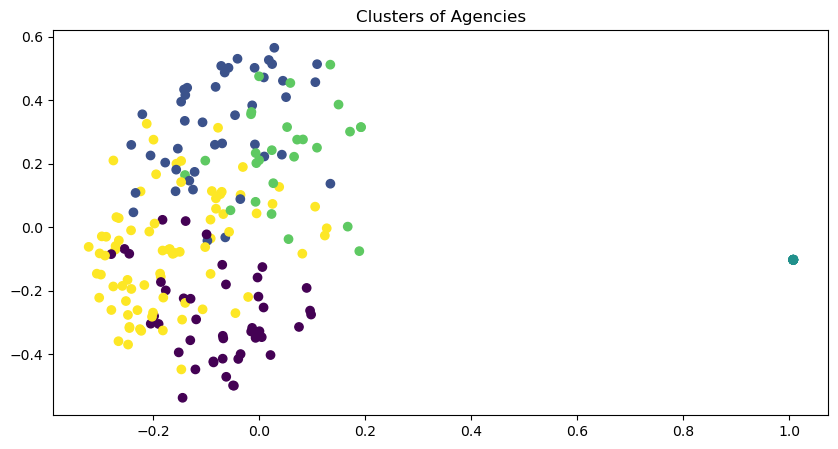

In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to tfidf_matrix for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tfidf_matrix.toarray())

# Plot
plt.figure(figsize=(10,5))
plt.scatter(pca_features[:,0], pca_features[:,1], c=agency['Cluster'])
plt.title('Clusters of Agencies')
plt.show()


In [68]:
#clustering
from sklearn.cluster import KMeans

# 5 clusters
k = 5

# Initialize and fit KMeans model to the data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign labels to the original dataframe
agency['Cluster'] = kmeans.labels_


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join 'Skills' and 'Industries' into one column in agency dataset
agency['Features'] = agency['Skills'].astype(str) + ' ' + agency['Industries'].astype(str)

# Fit TfidfVectorizer to the 'Features' text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(agency['Features'])

# Get feature names for visualization later
feature_names = tfidf.get_feature_names_out()


### machine learning approach-k means

### conclusion-neural network or deep learning methods wont make sense since there isnt enough data to learn from per say*

In [26]:
# create the model
model = Sequential()
model.add(Dense(64, input_dim=train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) 

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model to the training data
model.fit(train, train['Match Score'], epochs=10, batch_size=10)

# evaluate the model
scores = model.evaluate(test, test['Match Score'])
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2023-06-19 18:05:58.041630: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda/envs/Python3/lib:
2023-06-19 18:05:58.041659: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-19 18:05:58.041678: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cube-13f79dfd-0ca9-4ee1-9834-5d46570a00ed-65c8d775cc-zrkbf): /proc/driver/nvidia/version does not exist
2023-06-19 18:05:58.041902: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1/1 [==============================] - 0s 445ms/step - loss: 0.2185
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 0.1642
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.1196
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0828
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 10/10
1/1 [==============================] - 0s 81ms/step - loss: 0.1896


IndexError: list index out of range

In [25]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns=['Client Name', 'Brief Name', 'Brief Location', 'Brief Tags', 
                                 'Agency Name', 'Agency Location', 'Agency Tags', 
                                 'Agency Features', 'Industries', 'Skillset'])

# split the data into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Neural Network--Deep Learning Approach

In [23]:
import pandas as pd
import numpy as np

# Creating synthetic data
np.random.seed(42)

data = {
    'Client Name': ['Client'+str(i) for i in np.random.randint(1, 10, 10)],
    'Brief Name': ['Brief'+str(i) for i in np.random.randint(1, 10, 10)],
    'Brief Location': ['Location'+str(i) for i in np.random.randint(1, 5, 10)],
    'Brief Tags': ['Tag'+str(np.random.randint(1, 10))+', Tag'+str(np.random.randint(1, 10))+', Tag'+str(np.random.randint(1, 10)) for _ in range(10)],
    'Agency Name': ['Agency'+str(i) for i in np.random.randint(1, 10, 10)],
    'Agency Location': ['Location'+str(i) for i in np.random.randint(1, 5, 10)],
    'Agency Tags': ['Tag'+str(np.random.randint(1, 10))+', Tag'+str(np.random.randint(1, 10))+', Tag'+str(np.random.randint(1, 10)) for _ in range(10)],
    'Reason1': np.random.randint(0, 2, 10),
    'Reason2': np.random.randint(0, 2, 10),
    'Reason3': np.random.randint(0, 2, 10),
    'Reason4': np.random.randint(0, 2, 10),
    'Reason5': np.random.randint(0, 2, 10),
    'Reason6': np.random.randint(0, 2, 10),
    'Reason7': np.random.randint(0, 2, 10),
    'Match Score': np.random.uniform(0, 1, 10),
    'Agency Features': ['Feature'+str(np.random.randint(1, 10))+', Feature'+str(np.random.randint(1, 10))+', Feature'+str(np.random.randint(1, 10)) for _ in range(10)],
    'Industries': ['Industry'+str(i) for i in np.random.randint(1, 5, 10)],
    'Skillset': ['Skill'+str(np.random.randint(1, 10))+', Skill'+str(np.random.randint(1, 10))+', Skill'+str(np.random.randint(1, 10)) for _ in range(10)],
}

df = pd.DataFrame(data)
df.head()

,Client Name,Brief Name,Brief Location,Brief Tags,Agency Name,Agency Location,Agency Tags,Reason1,Reason2,Reason3,Reason4,Reason5,Reason6,Reason7,Match Score,Agency Features,Industries,Skillset
0,Client7,Brief8,Location1,"Tag3, Tag7, Tag4",Agency4,Location4,"Tag9, Tag1, Tag9",0,1,1,1,1,0,1,0.110052,"Feature8, Feature6, Feature8",Industry3,"Skill2, Skill6, Skill6"
1,Client4,Brief8,Location4,"Tag9, Tag3, Tag5",Agency6,Location1,"Tag7, Tag9, Tag8",0,0,1,1,0,1,1,0.227935,"Feature9, Feature4, Feature1",Industry3,"Skill1, Skill9, Skill6"
2,Client8,Brief3,Location2,"Tag3, Tag7, Tag5",Agency2,Location2,"Tag1, Tag8, Tag8",0,0,0,1,1,0,0,0.427108,"Feature1, Feature4, Feature7",Industry4,"Skill3, Skill4, Skill4"
3,Client5,Brief6,Location2,"Tag9, Tag7, Tag2",Agency2,Location3,"Tag3, Tag1, Tag8",0,1,0,0,0,0,1,0.818015,"Feature2, Feature3, Feature1",Industry3,"Skill3, Skill3, Skill3"
4,Client7,Brief5,Location1,"Tag4, Tag9, Tag2",Agency4,Location1,"Tag3, Tag3, Tag1",0,0,0,0,0,1,1,0.860731,"Feature5, Feature1, Feature8",Industry1,"Skill4, Skill7, Skill4"


## t2

In [14]:
# Normalizing numerical features
numerical_cols = ['Reason for matching 1', 'Reason for matching 2', 'Reason for matching 3', 'Reason for matching 4', 'Reason for matching 5', 'Reason for matching 6', 'Reason for matching 7']
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [83]:
# Setting up the model
inputs = []
embeddings = []

for col in data.columns:
    if col == 'Match Score':
        continue
    input_col = Input(shape=(1,), name=col)
    inputs.append(input_col)
    if col in multivalue_cols:
        embedding_size = min(50, data[col].nunique() // 2)
        embedding = Embedding(data[col].nunique(), embedding_size, input_length=1)(input_col)
        embedding = Flatten()(embedding)
    elif col in categorical_cols:
        embedding_size = min(50, data[col].nunique() // 2)
        embedding = Embedding(data[col].nunique(), embedding_size, input_length=1)(input_col)
        embedding = Flatten()(embedding)
    else:
        # 'Reason for matching' columns are treated as categorical
        embedding_size = min(50, data[col].nunique() // 2)
        embedding = Embedding(data[col].nunique(), embedding_size, input_length=1)(input_col)
        embedding = Flatten()(embedding)
    embeddings.append(embedding)

x = Concatenate()(embeddings)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='linear')(x)

model = Model(inputs, output)

model.compile(loss='mean_squared_error', optimizer='adam')

# Split your data
X = data.drop('Match Score', axis=1)
y = data['Match Score']

# Training your model
model.fit([X[col] for col in X.columns], y, epochs=10, batch_size=32)


2023-06-22 14:01:47.172896: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda/envs/Python3/lib:
2023-06-22 14:01:47.172935: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-22 14:01:47.172958: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cube-2981f987-34e3-4529-aeee-c05497dc824a-7f7f8cb9f7-bsh7n): /proc/driver/nvidia/version does not exist
2023-06-22 14:01:47.173155: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TypeError: unhashable type: 'numpy.ndarray'

In [82]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Input, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Splitting and encoding the multi-value categorical features
multivalue_cols = ['Brief Tags', 'Agency Tags', 'Agency Features', 'Industries', 'Skillset']
encoders = {}

for col in multivalue_cols:
    data[col] = data[col].apply(lambda x: ','.join(x))  # Convert the array back to a string
    data[col] = data[col].apply(lambda x: x.split(','))  # Split the string into a list
    le = LabelEncoder()
    data[col] = data[col].apply(lambda x: le.fit_transform(x))
    encoders[col] = le


# # Encoding the rest of the categorical features
categorical_cols = ['Client Name', 'Brief Name', 'Brief Location', 'Agency Name', 'Agency Location']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

2023-06-22 14:01:39.351659: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda/envs/Python3/lib:
2023-06-22 14:01:39.351712: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [81]:
import pandas as pd
import numpy as np

# Generate a random DataFrame
np.random.seed(0)
data = pd.DataFrame({
    'Client Name': ['Client {}'.format(i) for i in range(1, 6)],
    'Brief Name': ['Brief {}'.format(i) for i in range(1, 6)],
    'Brief Location': ['Region {}'.format(np.random.randint(1, 4)) for _ in range(5)],
    'Brief Tags': ['Tag1,Tag2,Tag3', 'Tag1,Tag2', 'Tag1,Tag3', 'Tag2,Tag3', 'Tag1,Tag2,Tag3'],
    'Agency Name': ['Agency {}'.format(i) for i in range(1, 6)],
    'Agency Location': ['Region {}'.format(np.random.randint(1, 4)) for _ in range(5)],
    'Agency Tags': ['Tag1,Tag3', 'Tag1,Tag2', 'Tag2,Tag3', 'Tag1,Tag2,Tag3', 'Tag1,Tag2'],
    'Reason for matching 1': np.random.random(5),
    'Reason for matching 2': np.random.random(5),
    'Reason for matching 3': np.random.random(5),
    'Reason for matching 4': np.random.random(5),
    'Reason for matching 5': np.random.random(5),
    'Reason for matching 6': np.random.random(5),
    'Reason for matching 7': np.random.random(5),
    'Match Score': np.random.randint(1, 100, 5),
    'Agency Features': ['Feature1,Feature2', 'Feature2,Feature3', 'Feature1,Feature3', 'Feature1,Feature2,Feature3', 'Feature1,Feature2'],
    'Industries': ['Industry1,Industry2', 'Industry1,Industry3', 'Industry2,Industry3', 'Industry1,Industry2,Industry3', 'Industry1,Industry2'],
    'Skillset': ['Skill1,Skill2', 'Skill1,Skill3', 'Skill2,Skill3', 'Skill1,Skill2,Skill3', 'Skill1,Skill2']
})

data.head()

,Client Name,Brief Name,Brief Location,Brief Tags,Agency Name,Agency Location,Agency Tags,Reason for matching 1,Reason for matching 2,Reason for matching 3,Reason for matching 4,Reason for matching 5,Reason for matching 6,Reason for matching 7,Match Score,Agency Features,Industries,Skillset
0,Client 1,Brief 1,Region 1,"Tag1,Tag2,Tag3",Agency 1,Region 3,"Tag1,Tag3",0.272656,0.836079,0.140351,0.678880,0.105908,0.135218,0.902598,58,"Feature1,Feature2","Industry1,Industry2","Skill1,Skill2"
1,Client 2,Brief 2,Region 2,"Tag1,Tag2",Agency 2,Region 1,"Tag1,Tag2",0.477665,0.337396,0.870087,0.720633,0.473600,0.324141,0.449950,36,"Feature2,Feature3","Industry1,Industry3","Skill1,Skill3"
2,Client 3,Brief 3,Region 1,"Tag1,Tag3",Agency 3,Region 3,"Tag2,Tag3",0.812169,0.648172,0.473608,0.582020,0.186332,0.149675,0.613063,12,"Feature1,Feature3","Industry2,Industry3","Skill2,Skill3"
3,Client 4,Brief 4,Region 2,"Tag2,Tag3",Agency 4,Region 1,"Tag1,Tag2,Tag3",0.479977,0.368242,0.800911,0.537373,0.736918,0.222321,0.902349,47,"Feature1,Feature2,Feature3","Industry1,Industry2,Industry3","Skill1,Skill2,Skill3"
4,Client 5,Brief 5,Region 2,"Tag1,Tag2,Tag3",Agency 5,Region 1,"Tag1,Tag2",0.392785,0.957155,0.520477,0.758616,0.216550,0.386489,0.099280,83,"Feature1,Feature2","Industry1,Industry2","Skill1,Skill2"
